import library

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.linear_model import Lasso, LassoCV

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
df.shape

(500, 8)

# 1. Business understanding



An e-commerce company sells clothes online, but they have a physical store that they can go to for advice and advice on styles. They try to determine if you should focus on improving the experience of your mobile app or on your website, for this feature the customer profile is accurate:

We work with Ecommerce customers data. There are 8 columns in the data

3 columns including Customers information such as Email, Address, and Avatar( (String value)

    

*  Avatar is color of the dress




It also has numeric columns :


    

*   Avg. Session Length: AMedium-sized store-style consulting sessions.
*   Time on App: Average time spent on App in minutes



* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member
* Yearly Amount Spent: The amount of money the customer spent by year

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Lets's figure it out! Let's get started!


# 2. Data Understanding


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [8]:
df.duplicated().sum()

np.int64(0)

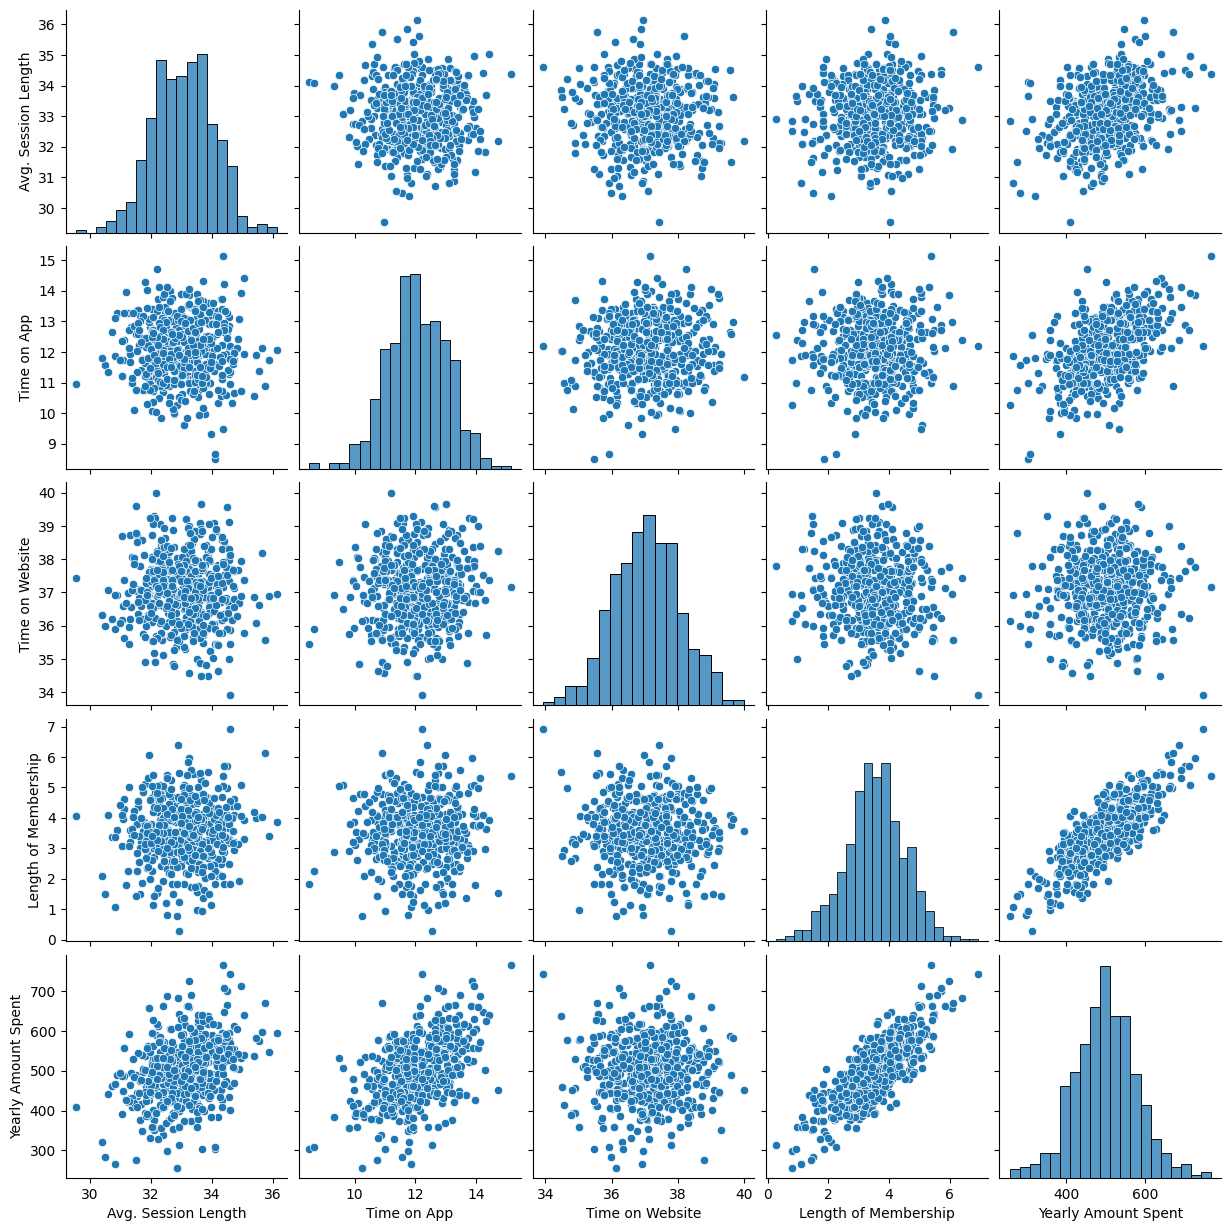

In [9]:
sns.pairplot(df)

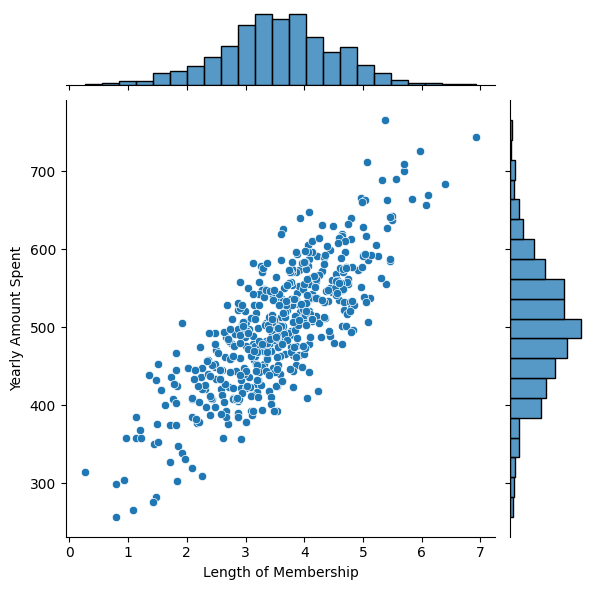

In [10]:
sns.jointplot(data= df ,  x= 'Length of Membership', y= 'Yearly Amount Spent')

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correl = numeric_df.corr()
correl

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


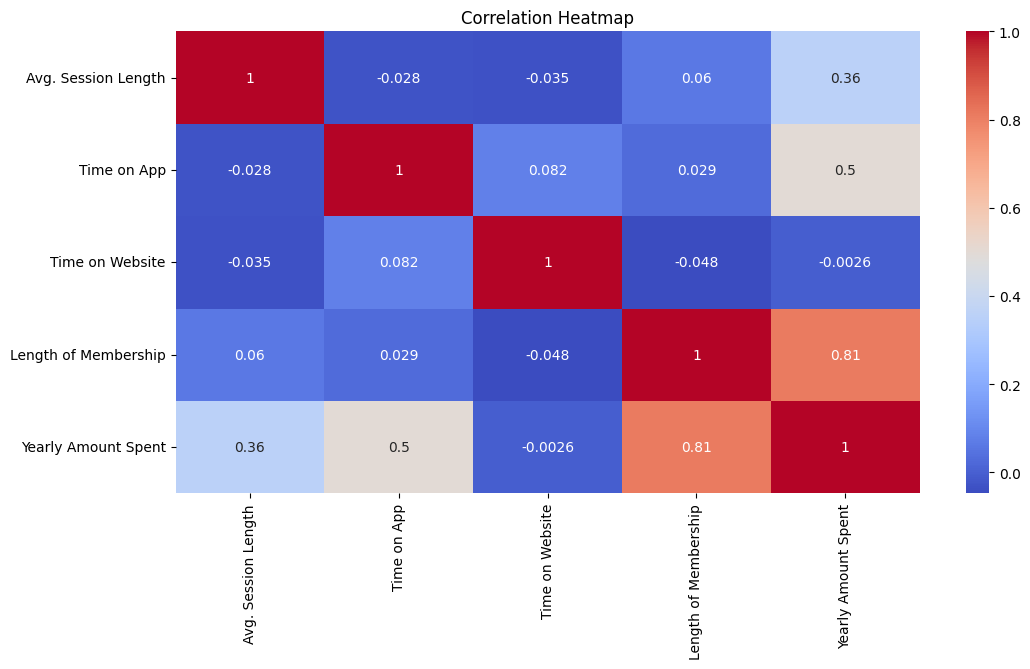

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

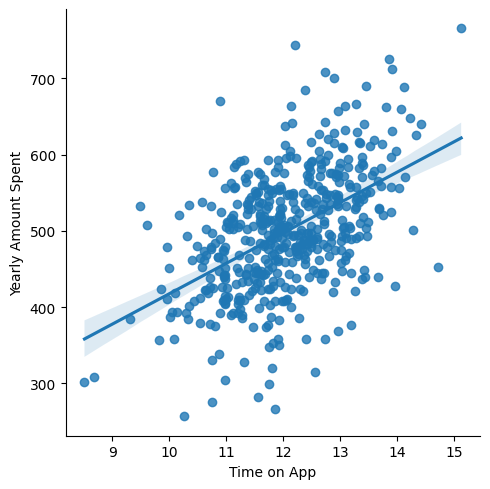

In [14]:
sns.lmplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df)

## Distribution of email


In [15]:
df['Email'].sample(5)

,Email
177,jacquelinehughes@bennett-branch.info
194,patrickorr@yahoo.com
204,connerjoseph@gmail.com
171,gbarnes@gmail.com
209,wagnerbrian@hotmail.com


In [16]:
df['Email'][284]

'zachary94@gmail.com'

In [17]:
df['Email'][284].split('@')

['zachary94', 'gmail.com']

In [18]:
df['Email'][284].split('@')[1]

'gmail.com'

In [19]:
df['Domain'] = df['Email'].apply(lambda x: x.split('@')[1])
df['Domain']

,Domain
0,fernandez.com
1,hotmail.com
2,yahoo.com
3,gmail.com
4,davidson-herman.com
...,...
495,craig-evans.com
496,gmail.com
497,hotmail.com
498,hotmail.com


In [20]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


In [21]:
df['Domain'].value_counts()

,count
Domain,
hotmail.com,87
gmail.com,87
yahoo.com,76
davis.com,2
edwards.com,2
...,...
sanchez.org,1
lowery.net,1
chan.biz,1


## category : Gmail , Hotmail , Yhahoo , Personal

In [22]:
list_email = [87,87,76 , 500 -87-87-76]
list_email

[87, 87, 76, 250]

In [23]:
df_email = pd.DataFrame( list_email , index= ["Gmail" ,'Hotmail','Yhahoo' ,'Personol'], columns = ['Count'])
df_email

,Count
Gmail,87
Hotmail,87
Yhahoo,76
Personol,250


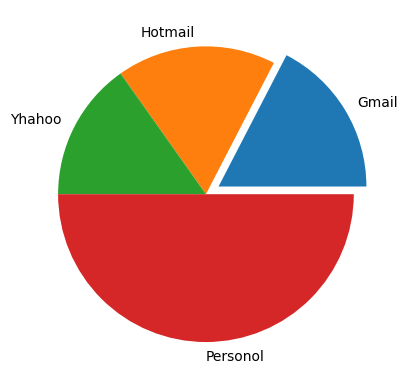

In [24]:
# visualization category email

plt.pie(df_email['Count'],
        labels = ["Gmail" ,'Hotmail','Yhahoo' ,'Personol'],
        explode = [0.1 ,0,0,0]);

In [25]:
df['Domain'] = df['Domain'].apply(lambda x: x.split('.')[0])
df['Domain']

,Domain
0,fernandez
1,hotmail
2,yahoo
3,gmail
4,davidson-herman
...,...
495,craig-evans
496,gmail
497,hotmail
498,hotmail


In [26]:
df['Domain2'] = df['Domain'].apply(lambda x: 'Personal' if (( x != 'gmail')&( x != 'hotmail')&( x != 'yhahoo')) else x)
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain,Domain2
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez,Personal
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,hotmail
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,Personal
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,gmail
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman,Personal


## FaceGrid on Domain

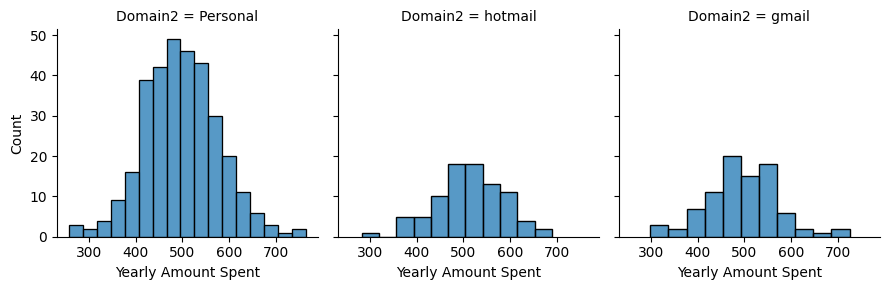

In [27]:
g = sns.FacetGrid(df , col = 'Domain2')
g.map(sns.histplot , 'Yearly Amount Spent')

## Box plot of response

{'whiskers': [<matplotlib.lines.Line2D at 0x7a239be4eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x7a239be4f0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a239bfa7770>],
 'medians': [<matplotlib.lines.Line2D at 0x7a239be4f680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a239be4f920>],
 'means': []}

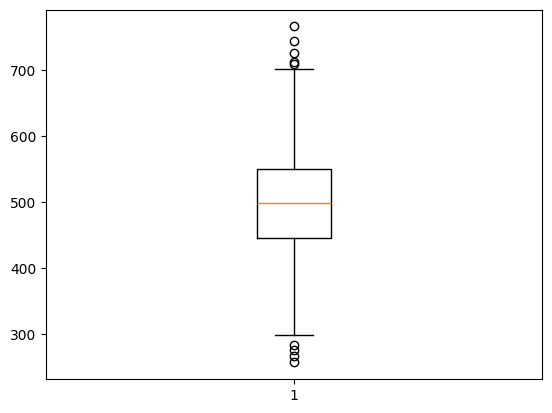

In [28]:
plt.boxplot(df['Yearly Amount Spent'])

# 3. Data Preparation

In [29]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Domain', 'Domain2'],
      dtype='object')

## 3.1 making a set of x(feature) , y(prediction)

In [30]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [31]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [32]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


## 3.2 scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler_data = StandardScaler().fit_transform(X)
scaler_data


array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

In [34]:
X = pd.DataFrame(scaler_data , columns = X.columns)
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.456351,0.607280,2.493589,0.550107
1,-1.136502,-0.949464,0.206556,-0.870927
2,-0.052723,-0.727139,0.049681,0.572067
3,1.263010,1.676390,-0.335978,-0.413996
4,0.279838,0.747770,0.471737,0.914422


## 3.3 train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 101)

In [37]:
X_train.shape

(350, 4)

In [38]:
X_test.shape

(150, 4)

# 4 . create the models

## 4.1. model 1 : linear regression

In [39]:
from  sklearn.linear_model import LinearRegression

In [40]:
linear_model = LinearRegression()

In [41]:
linear_model.fit(X_train , y_train)

LinearRegression()

In [42]:
# dataframe of coefficent
COE=pd.DataFrame()
COE['Variable']=X_train.columns
COE['Coef']=linear_model.coef_[:]
COE

,Variable,Coef
0,Avg. Session Length,25.762527
1,Time on App,38.328552
2,Time on Website,0.192210
3,Length of Membership,61.173557


### 4.1.1. Generalizability of the regression model



*   Normality of error
*   Independence of error



In [43]:
pred1_train = linear_model.predict(X_train)

In [44]:
res1 = y_train - pred1_train

#### Method 1 for normality (histogeram)

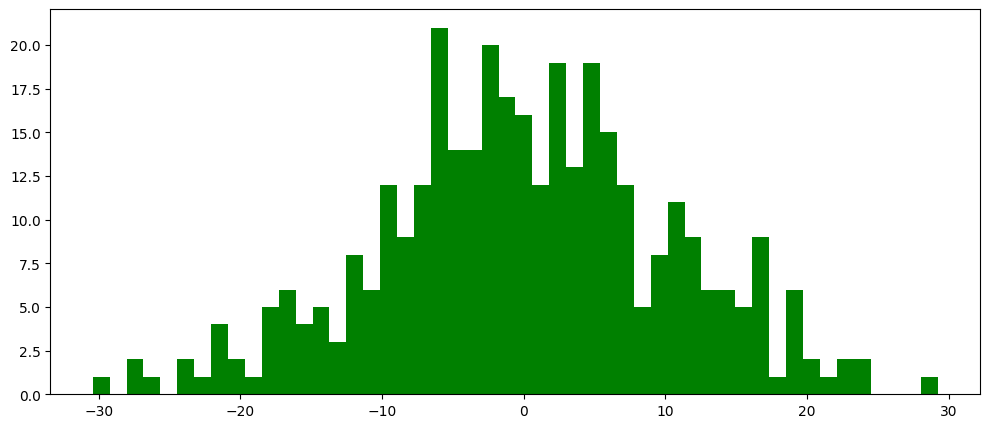

In [45]:
plt.figure(figsize=(12,5))
plt.hist((y_train-pred1_train),bins=50,color='green');


#### Method 2 for normality (QQ_plot)

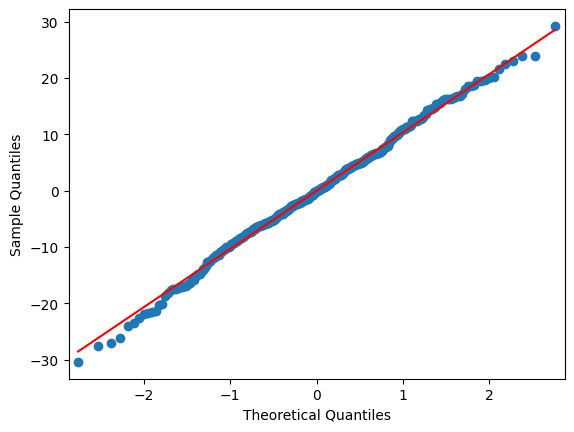

In [46]:
import statsmodels.api as sm
sm.qqplot(res1, line='s');

#### Method 3 for normality (shapiro-wilk)

In [47]:
import scipy.stats as ss
ss.shapiro(res1)

ShapiroResult(statistic=np.float64(0.9967309239305516), pvalue=np.float64(0.702403750310407))

#### Method 3 for normality (Jarque_Bera)

In [48]:
import scipy.stats as ss
ss.jarque_bera(res1)

SignificanceResult(statistic=np.float64(0.5049271951369629), pvalue=np.float64(0.7768844928091277))

### *The* predicted value vs. Residual

Text(0.5, 1.0, 'The predicted value vs. Residual')

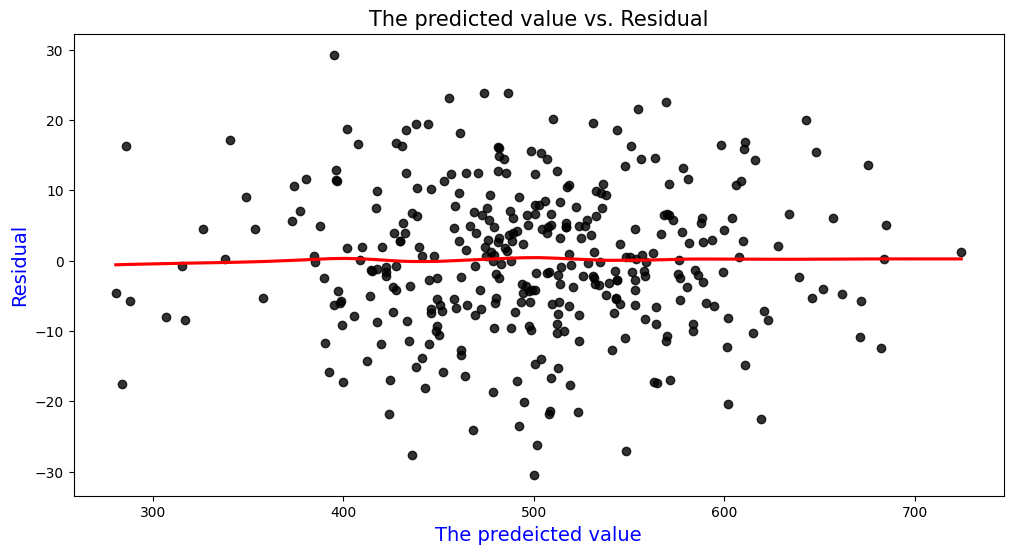

In [49]:
plt.figure(figsize=(12,6))
sns.regplot(x=pred1_train,y=res1,
            line_kws={'color':'red'},
            lowess=True,scatter_kws={'color':'black'})
plt.xlabel('The predeicted value',color='blue',fontsize=14)
plt.ylabel('Residual',color='blue',fontsize=14)
plt.title('The predicted value vs. Residual',fontsize=15)

### 4.1.2. Prediction on Test dataset

In [50]:
pred_linreg=linear_model.predict(X_test)

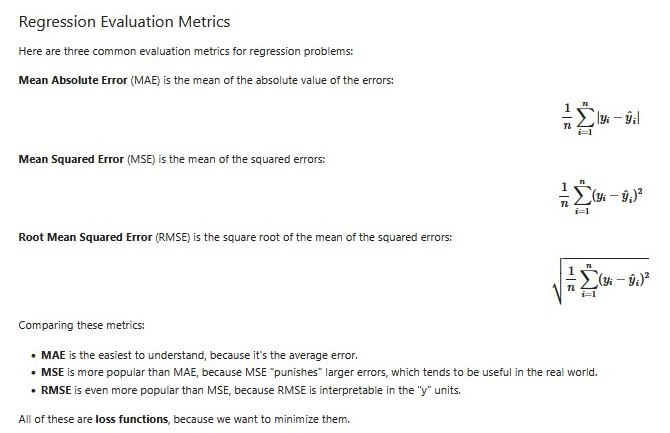

In [51]:
from sklearn import metrics

In [52]:
print('MAE',metrics.mean_absolute_error(y_test,pred_linreg))
print('MSE',metrics.mean_squared_error(y_test,pred_linreg))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred_linreg)))

MAE 7.22814865343083
MSE 79.81305165097447
RMSE 8.933815066978635


In [53]:
modes_evaluate=pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_linreg),
                           'MSE': metrics.mean_squared_error(y_test,pred_linreg),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_linreg))}, index=['Linear Regression'])
modes_evaluate



,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815



Actual vs. Prediction

Text(0, 0.5, 'Perdiction')

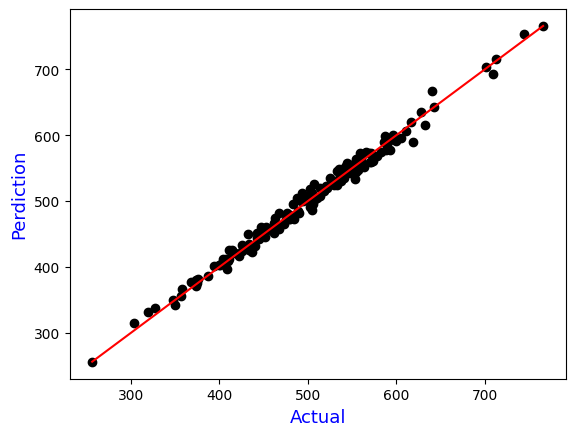

In [54]:
# scatter plot
plt.scatter(x=y_test,y=pred_linreg,color='black')
## 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),200)
plt.plot(xp,xp,color='red')

plt.xlabel('Actual',color='blue',fontsize=13)
plt.ylabel('Perdiction',color='blue',fontsize=13)



## 4.1. model 2 : Ridge Regression


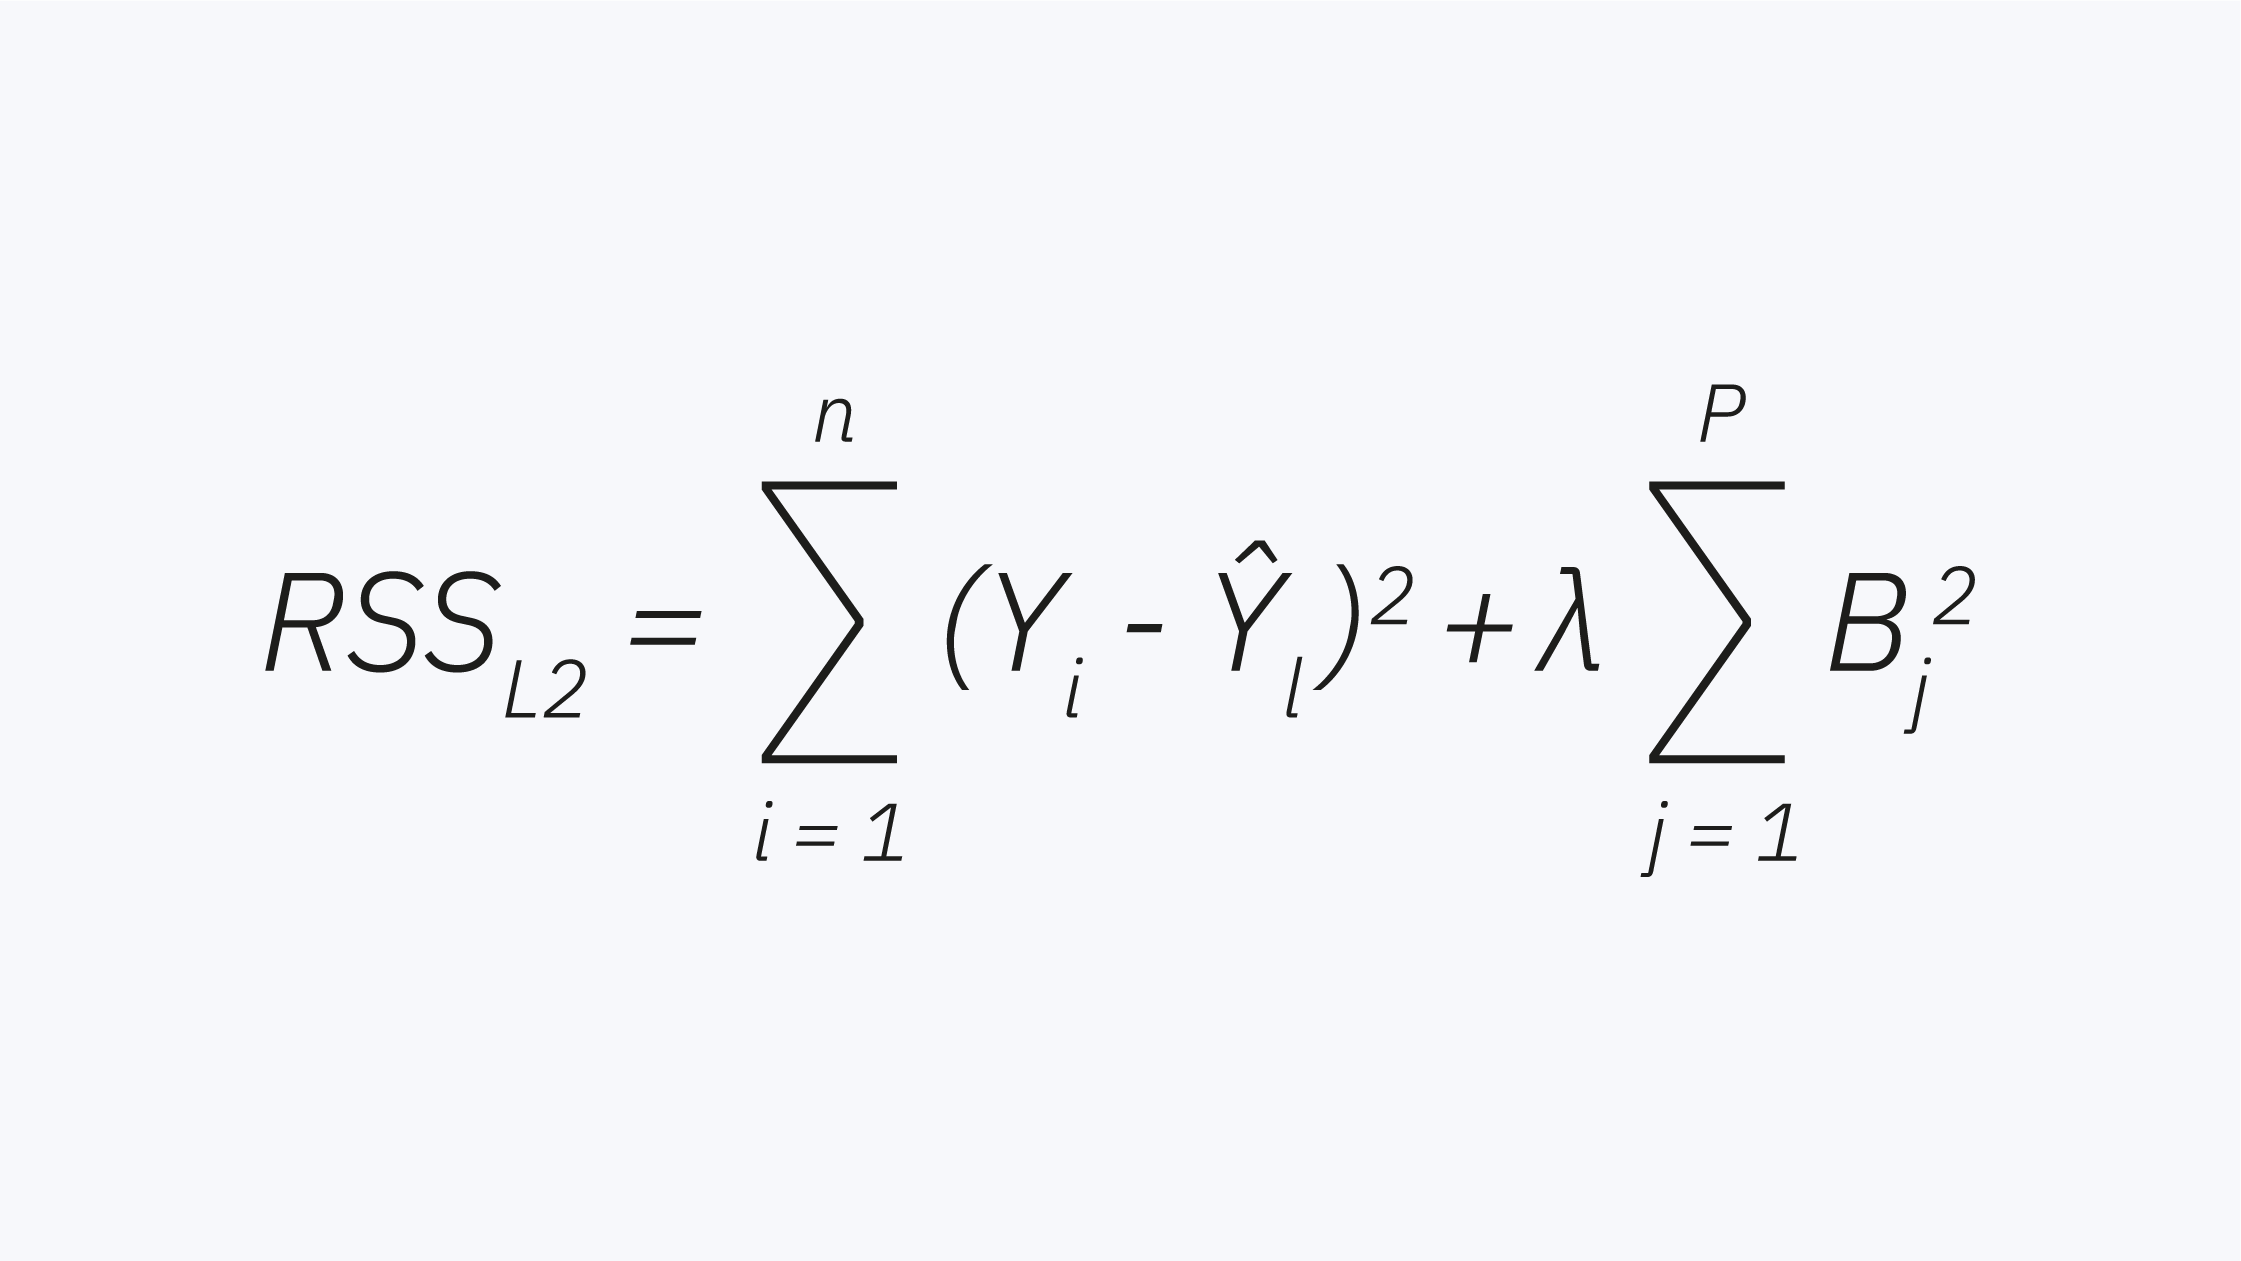

In [55]:
lambda_grid=10**np.linspace(5,-2,100)
lambda_grid

array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.96304065e+04, 1.66810054e+04,
       1.41747416e+04, 1.20450354e+04, 1.02353102e+04, 8.69749003e+03,
       7.39072203e+03, 6.28029144e+03, 5.33669923e+03, 4.53487851e+03,
       3.85352859e+03, 3.27454916e+03, 2.78255940e+03, 2.36448941e+03,
       2.00923300e+03, 1.70735265e+03, 1.45082878e+03, 1.23284674e+03,
       1.04761575e+03, 8.90215085e+02, 7.56463328e+02, 6.42807312e+02,
       5.46227722e+02, 4.64158883e+02, 3.94420606e+02, 3.35160265e+02,
       2.84803587e+02, 2.42012826e+02, 2.05651231e+02, 1.74752840e+02,
       1.48496826e+02, 1.26185688e+02, 1.07226722e+02, 9.11162756e+01,
       7.74263683e+01, 6.57933225e+01, 5.59081018e+01, 4.75081016e+01,
       4.03701726e+01, 3.43046929e+01, 2.91505306e+01, 2.47707636e+01,
       2.10490414e+01, 1.78864953e+01, 1.51991108e+01, 1.29154967e+01,
      

In [56]:
from sklearn.linear_model import Ridge,RidgeCV

Construct the Dataframe for lamda_grid

In [57]:
ridgereg=Ridge()


In [58]:
models=pd.DataFrame(index=lambda_grid,columns=X_train.columns)
models

,Avg. Session Length,Time on App,Time on Website,Length of Membership
100000.000000,NaN,NaN,NaN,NaN
84975.343591,NaN,NaN,NaN,NaN
72208.090184,NaN,NaN,NaN,NaN
61359.072734,NaN,NaN,NaN,NaN
52140.082880,NaN,NaN,NaN,NaN
...,...,...,...,...
0.019179,NaN,NaN,NaN,NaN
0.016298,NaN,NaN,NaN,NaN
0.013849,NaN,NaN,NaN,NaN
0.011768,NaN,NaN,NaN,NaN


In [59]:
# fill the dataframe by coefficents
for i in lambda_grid:
    ridgereg.set_params(alpha=i) # determine the lamda of the model
    ridgereg.fit(X_train,y_train) # fit the model
    models.loc[i,:]=ridgereg.coef_ ; # put the coeffecient in the dataframe

In [60]:
# the constructed dataframe
models.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
100000.000000,0.089488,0.12321,0.004531,0.212959
84975.343591,0.105245,0.144912,0.005327,0.250459
72208.090184,0.123763,0.17042,0.006262,0.294531
61359.072734,0.145522,0.200395,0.007359,0.346313
52140.082880,0.171079,0.235608,0.008647,0.407139



Plot the lamda vs. the coeficent of variables

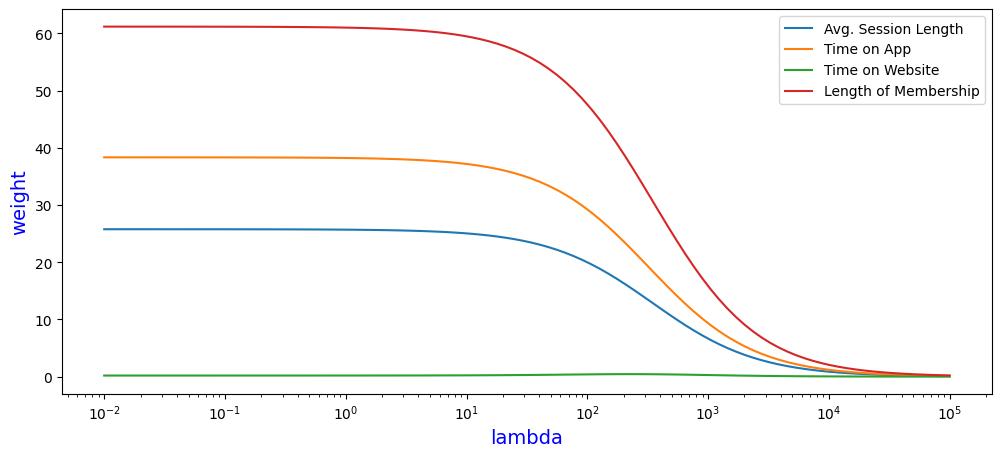

In [61]:
# plot the result
plt.figure(figsize=(12,5))
plot_ridge=plt.gca() # creat an axes
# gca is used to get the current Axes intance on the current figure
plot_ridge.plot(lambda_grid,models) # x=lamda grid   y=coeffiecent
plot_ridge.set_xscale('log')        # scale the lamda
plt.xlabel('lambda',color='blue',fontsize=14)
plt.ylabel('weight', color='blue',fontsize=14)
plot_ridge.legend(models.columns)   # legenD


In [62]:
models.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')


K fold cross validation for Ridge Regression




*   Ridge regression with built-in cross-validation.
*   By default, it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.
*   Read more in the User Guide .






In [63]:


# K_fold Cross validation to choose the best model
redgecv=RidgeCV(alphas=lambda_grid, cv=10,scoring='neg_mean_squared_error' )
## This parameter is ignored when fit_intercept is set to False.
# If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
# If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.
redgecv.fit(X_train,y_train)
redgecv.alpha_ # the best value of lambda



np.float64(0.25950242113997374)

In [64]:
# The paraameter of regression model
redgecv.coef_

array([25.74318198, 38.29759206,  0.19320548, 61.12828504])


Prediction

In [65]:
redgreg=Ridge(alpha=redgecv.alpha_)

In [66]:
redgreg.fit(X_train,y_train)

Ridge(alpha=np.float64(0.25950242113997374))



redgreg.fit(X_train,y_train)



In [67]:
pred_ridge=redgreg.predict(X_test)
pred_ridge

array([456.46769589, 402.79798832, 409.32366514, 591.36086656,
       589.9462293 , 548.78537643, 577.53415054, 715.27940716,
       473.80884795, 545.88596323, 337.97926404, 500.37988346,
       552.8932875 , 409.67129533, 765.32008734, 545.80301102,
       693.11256824, 507.31673802, 573.04567799, 573.14720993,
       397.52901427, 555.0551594 , 458.22792486, 482.68144213,
       559.2182004 , 413.07847018, 532.22997849, 377.74332613,
       534.99038958, 447.84219167, 595.46687481, 667.01234632,
       511.94768844, 573.24871124, 505.0180203 , 565.2556472 ,
       460.41750297, 449.78394107, 422.92549711, 456.58550889,
       598.03184754, 449.68567241, 615.2617888 , 511.86997872,
       504.37059464, 515.93506686, 568.59445994, 551.57258492,
       356.6649031 , 464.99903978, 481.67471565, 534.19601492,
       256.46979946, 505.30511471, 520.00815156, 315.16755367,
       501.9808832 , 387.12787718, 472.99414857, 432.91804742,
       539.75817001, 589.96049093, 752.677429  , 558.23

In [69]:
modes_evaluate = pd.concat([modes_evaluate, pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_ridge),
                           'MSE': metrics.mean_squared_error(y_test,pred_ridge),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_ridge))}, index=['Ridge Regression'])])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815
Ridge Regression,7.230973,79.898319,8.938586


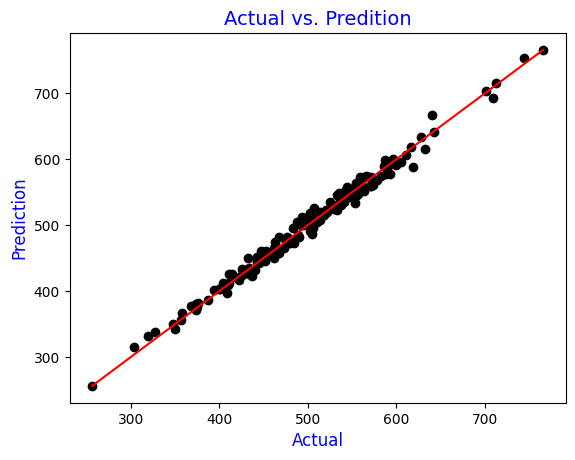

In [70]:


# Actula vs. Prediction
plt.scatter(x=y_test,y=pred_ridge,color='black')
plt.xlabel('Actual',color='blue',fontsize=12)
plt.ylabel('Prediction',color='blue',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

# Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')



## 4.2. model 3 : Lasso Regression

*   the goal is to optimize:Rss+lambda*sum(beta_i)
*   lambda =>0




In [71]:
lambda_grid=100**np.linspace(4,-2,100)
lambda_grid

array([1.00000000e+08, 7.56463328e+07, 5.72236766e+07, 4.32876128e+07,
       3.27454916e+07, 2.47707636e+07, 1.87381742e+07, 1.41747416e+07,
       1.07226722e+07, 8.11130831e+06, 6.13590727e+06, 4.64158883e+06,
       3.51119173e+06, 2.65608778e+06, 2.00923300e+06, 1.51991108e+06,
       1.14975700e+06, 8.69749003e+05, 6.57933225e+05, 4.97702356e+05,
       3.76493581e+05, 2.84803587e+05, 2.15443469e+05, 1.62975083e+05,
       1.23284674e+05, 9.32603347e+04, 7.05480231e+04, 5.33669923e+04,
       4.03701726e+04, 3.05385551e+04, 2.31012970e+04, 1.74752840e+04,
       1.32194115e+04, 1.00000000e+04, 7.56463328e+03, 5.72236766e+03,
       4.32876128e+03, 3.27454916e+03, 2.47707636e+03, 1.87381742e+03,
       1.41747416e+03, 1.07226722e+03, 8.11130831e+02, 6.13590727e+02,
       4.64158883e+02, 3.51119173e+02, 2.65608778e+02, 2.00923300e+02,
       1.51991108e+02, 1.14975700e+02, 8.69749003e+01, 6.57933225e+01,
       4.97702356e+01, 3.76493581e+01, 2.84803587e+01, 2.15443469e+01,
      

In [72]:
models=pd.DataFrame(index=lambda_grid,columns=X_train.columns)
models

,Avg. Session Length,Time on App,Time on Website,Length of Membership
1.000000e+08,NaN,NaN,NaN,NaN
7.564633e+07,NaN,NaN,NaN,NaN
5.722368e+07,NaN,NaN,NaN,NaN
4.328761e+07,NaN,NaN,NaN,NaN
3.274549e+07,NaN,NaN,NaN,NaN
...,...,...,...,...
3.053856e-04,NaN,NaN,NaN,NaN
2.310130e-04,NaN,NaN,NaN,NaN
1.747528e-04,NaN,NaN,NaN,NaN
1.321941e-04,NaN,NaN,NaN,NaN


In [74]:
lassoreg=Lasso()

In [75]:
# fill the dataframe
for i in lambda_grid:
    lassoreg.set_params(alpha=i) # set the lambda for the model
    lassoreg.fit(X_train,y_train) # fit the model for x_train and y_trian
    models.loc[i,:]=lassoreg.coef_ # set the coeffecient for the corresponding rows
models



,Avg. Session Length,Time on App,Time on Website,Length of Membership
1.000000e+08,0.0,0.0,0.0,0.0
7.564633e+07,0.0,0.0,0.0,0.0
5.722368e+07,0.0,0.0,0.0,0.0
4.328761e+07,0.0,0.0,0.0,0.0
3.274549e+07,0.0,0.0,0.0,0.0
...,...,...,...,...
3.053856e-04,25.762243,38.328248,0.1919,61.173244
2.310130e-04,25.762316,38.328324,0.191975,61.17332
1.747528e-04,25.762372,38.328382,0.192031,61.173377
1.321941e-04,25.762414,38.328426,0.192074,61.173421



K fold cross validation for Ridge Regression

In [76]:
# K_fold Cross validation to choose the best model
lassocv= LassoCV(alphas=lambda_grid,cv=10,random_state=101)
lassocv.fit(X_train,y_train.values.ravel())
lassocv.alpha_     # the best value for lambda

np.float64(0.18738174228603868)

In [77]:
lassocv.coef_

array([2.55772448e+01, 3.81356955e+01, 3.45495657e-03, 6.09819818e+01])


Prediction

In [79]:
lassoreg=Lasso(alpha=lassocv.alpha_)

In [80]:
lassoreg.fit(X_train,y_train)

Lasso(alpha=np.float64(0.18738174228603868))

In [81]:
pred_lasso=lassoreg.predict(X_test)
pred_lasso

array([456.24973787, 402.8787247 , 409.5974795 , 590.96826058,
       589.7300658 , 548.54276733, 577.59977359, 714.2606032 ,
       474.00523912, 545.71078791, 338.48818497, 500.20544259,
       552.44345991, 410.13407473, 764.30751196, 545.83989874,
       692.61466445, 507.23732342, 572.73351474, 572.91247493,
       398.15145567, 554.99623039, 457.85095355, 482.82060485,
       559.25130926, 413.32226845, 532.08408737, 377.79521612,
       534.93287801, 447.68157457, 595.11988182, 666.17401996,
       511.72336654, 573.25920797, 504.83953306, 564.79415134,
       460.8197113 , 450.11567796, 423.15105604, 456.62748452,
       598.06583303, 449.54890324, 614.67062708, 512.06372807,
       504.28309356, 516.0569408 , 568.84818469, 551.21954193,
       357.48754461, 465.38345153, 481.79147301, 534.01758729,
       257.37133671, 505.33664868, 519.89059771, 315.75063368,
       501.67829333, 387.3290131 , 472.90986063, 433.21367682,
       539.45366687, 589.80094816, 752.48572405, 558.24

In [83]:
modes_evaluate=pd.concat([modes_evaluate, pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_lasso),
                           'MSE': metrics.mean_squared_error(y_test,pred_lasso),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_lasso))}, index=['Lasso Regression'])])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815
Ridge Regression,7.230973,79.898319,8.938586
Lasso Regression,7.251427,80.544021,8.974632


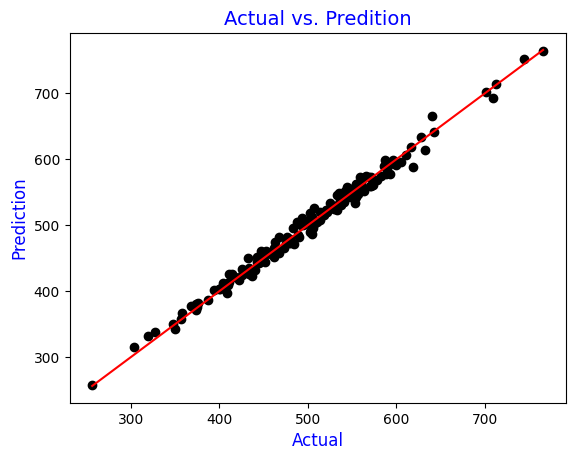

In [84]:
# Actula vs. Prediction
plt.scatter(x=y_test,y=pred_lasso,color='black')
plt.xlabel('Actual',color='blue',fontsize=12)
plt.ylabel('Prediction',color='blue',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

# Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')

Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
reg_tree=DecisionTreeRegressor(max_depth=3,
                               min_samples_leaf=5,
                               ccp_alpha=0.01)

In [87]:
fit_tree=reg_tree.fit(X_train,y_train)

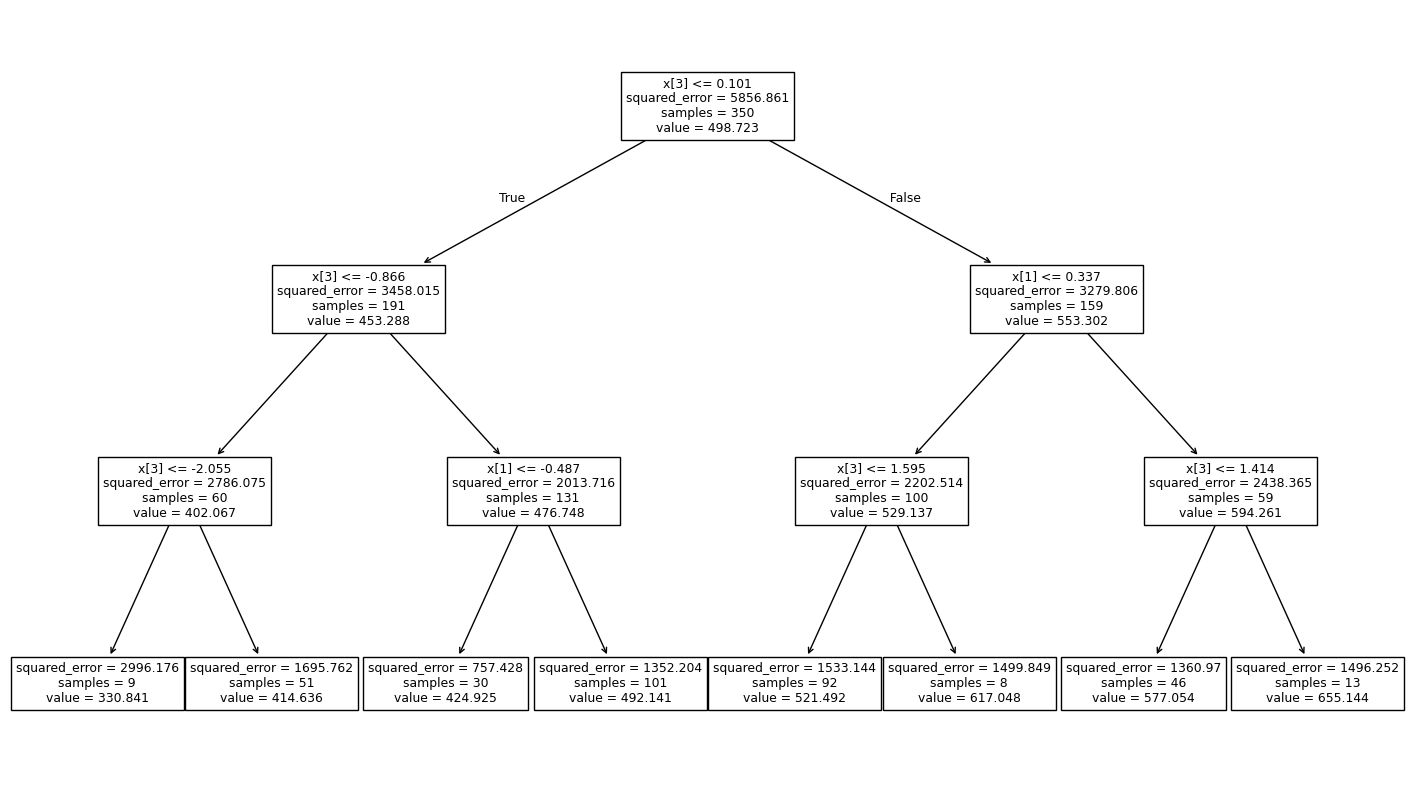

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(fit_tree);


K flod cross validation for Decision tree

In [90]:
import itertools
max_depth=[4,6,8]
min_samples_leaf=[5,10,15]
ccp_alpha=[0.0001,0.001,0.01]
grid=list(itertools.product(max_depth,min_samples_leaf,ccp_alpha))
grid=pd.DataFrame(grid,index=range(1,28),columns=['max_depth','min_samples_leaf','ccp_alpha'])
grid


,max_depth,min_samples_leaf,ccp_alpha
1,4,5,0.0001
2,4,5,0.0010
3,4,5,0.0100
4,4,10,0.0001
5,4,10,0.0010
6,4,10,0.0100
7,4,15,0.0001
8,4,15,0.0010
9,4,15,0.0100
10,6,5,0.0001


In [91]:


# k fold cross validtion
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,28):
    reg_tree=DecisionTreeRegressor(max_depth=grid.loc[i,'max_depth'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               ccp_alpha=grid.loc[i,'ccp_alpha'],random_state=101)
    Scores=cross_val_score(reg_tree,X=X_train,y=y_train,
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))



In [92]:
Scores

array([-1084.61922588, -1083.40333483, -1590.56830584, -1050.89996833,
       -2498.92936546, -1180.52305015, -2083.3986238 , -1712.3474276 ,
       -1657.82724733, -1170.04098833])

In [93]:
er

[np.float64(1860.8877983995203),
 np.float64(1860.8877983995203),
 np.float64(1860.8877983995203),
 np.float64(1771.5575613641588),
 np.float64(1771.5575613641588),
 np.float64(1771.5575613641588),
 np.float64(1767.5925352517893),
 np.float64(1767.5925352517893),
 np.float64(1767.5925352517893),
 np.float64(1195.7870829156686),
 np.float64(1195.7870829156686),
 np.float64(1195.7870829156686),
 np.float64(1379.0485264236504),
 np.float64(1379.0485264236504),
 np.float64(1379.0485264236504),
 np.float64(1511.2557537549535),
 np.float64(1511.2557537549535),
 np.float64(1511.2557537549535),
 np.float64(1107.939510055608),
 np.float64(1107.939510055608),
 np.float64(1107.939510055608),
 np.float64(1369.6841539808245),
 np.float64(1369.6841539808245),
 np.float64(1369.6841539808245),
 np.float64(1511.2557537549535),
 np.float64(1511.2557537549535),
 np.float64(1511.2557537549535)]

Text(0, 0.5, 'mean_squared_error')

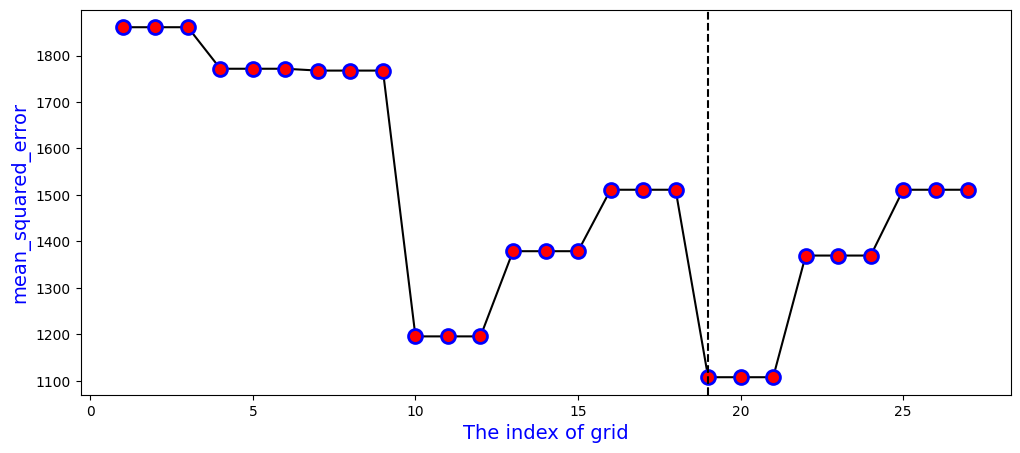

In [94]:
plt.figure(figsize=(12,5))
plt.plot(range(1,28),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')
plt.xlabel('The index of grid',fontsize=14,color='blue')
plt.ylabel('mean_squared_error',fontsize=14,color='blue')

In [95]:
reg_tree=DecisionTreeRegressor(max_depth=grid.loc[19,'max_depth'],
                               min_samples_leaf=grid.loc[19,'min_samples_leaf'],
                               ccp_alpha=grid.loc[19,'ccp_alpha'],random_state=101)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.0001), max_depth=np.int64(8),
                      min_samples_leaf=np.int64(5), random_state=101)

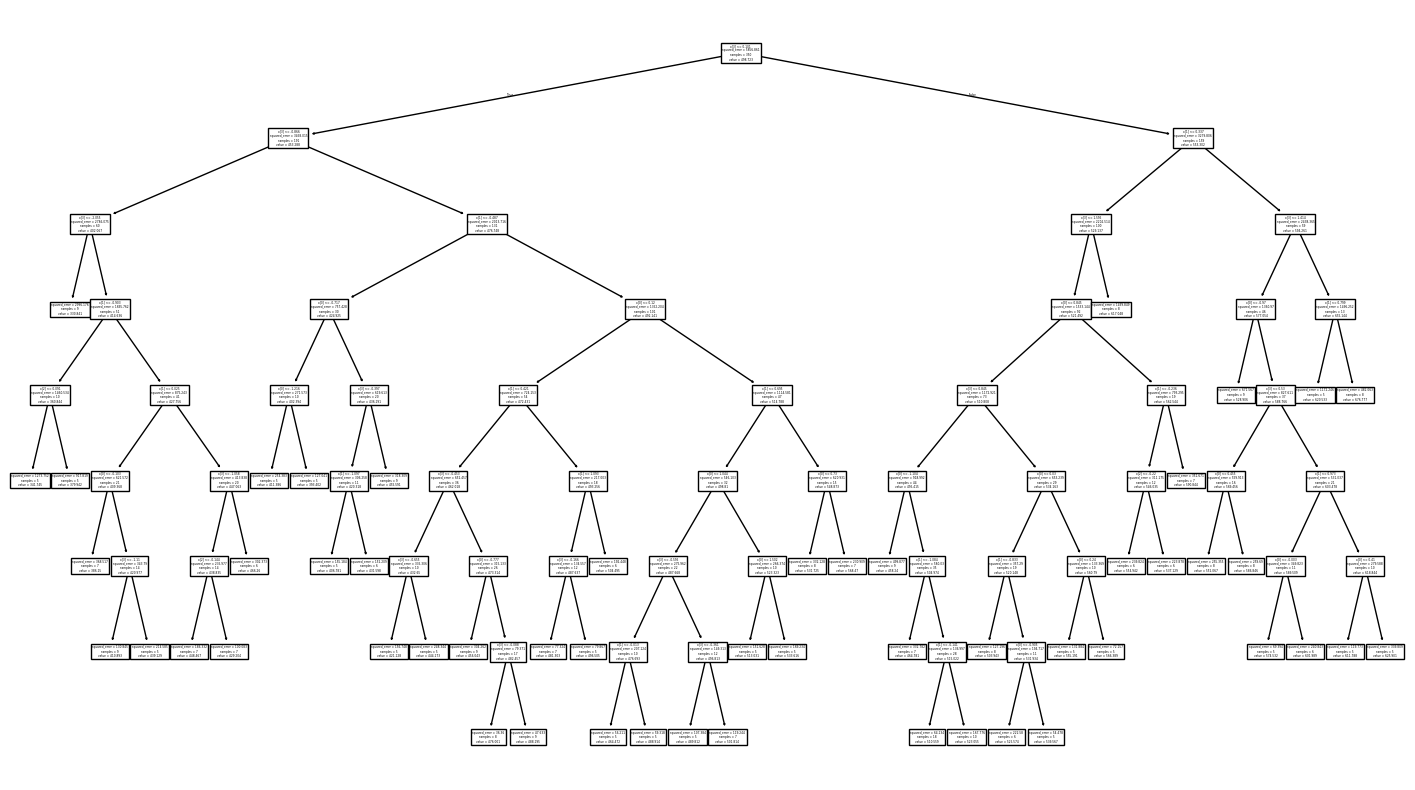

In [99]:
# fit the X_train and y_train
fit_tree=reg_tree.fit(X_train,y_train)

# plot the figure
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(fit_tree);

In [100]:


pred_tree=reg_tree.predict(X_test)
pred_tree



array([429.20357805, 393.40153584, 411.38605226, 601.98899425,
       620.53272828, 552.06687625, 611.78772686, 676.77684042,
       455.59067976, 574.53218552, 386.15017897, 429.20357805,
       552.06687625, 341.74517113, 676.77684042, 574.53218552,
       620.53272828, 496.5052241 , 531.72542697, 552.06687625,
       458.24024294, 590.84449498, 429.20357805, 510.55946561,
       574.53218552, 455.59067976, 496.5052241 , 330.84088995,
       504.49456013, 456.04274015, 611.78772686, 586.84559464,
       466.25984404, 554.94191003, 476.00147429, 566.38888427,
       455.59067976, 476.00147429, 448.46694432, 466.25984404,
       617.04806175, 393.40153584, 611.78772686, 523.05509679,
       533.61633205, 504.49456013, 554.94191003, 504.49456013,
       393.40153584, 456.04274015, 510.55946561, 523.05509679,
       330.84088995, 510.55946561, 566.38888427, 330.84088995,
       523.05509679, 406.78141436, 456.04274015, 410.893314  ,
       504.49456013, 601.98899425, 617.04806175, 528.90

In [102]:
modes_evaluate=pd.concat([modes_evaluate, pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_tree),
                           'MSE': metrics.mean_squared_error(y_test,pred_tree),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_tree))},
                                                  index=['Decision Tree Regression'])])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815
Ridge Regression,7.230973,79.898319,8.938586
Lasso Regression,7.251427,80.544021,8.974632
Decision Tree Regression,26.281544,1095.446481,33.097530


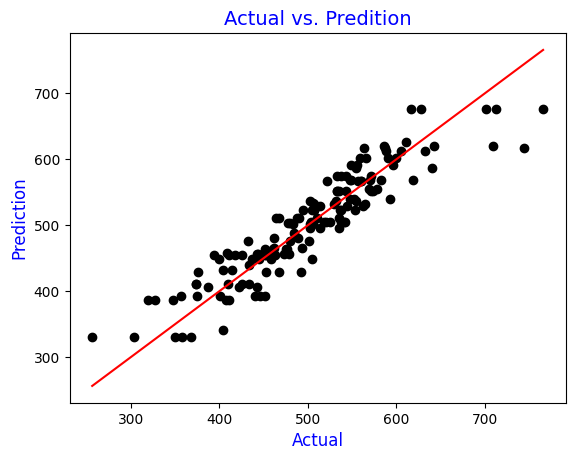

In [103]:


# Actula vs. Prediction
plt.scatter(x=y_test,y=pred_tree,color='black')
plt.xlabel('Actual',color='blue',fontsize=12)
plt.ylabel('Prediction',color='blue',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

# Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')




RandomForest


In [104]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500, min_samples_leaf=1,max_features=3,random_state=101)



K flod cross validation for RandomForest

In [106]:


import itertools
n_estimators=[50,100,150]
min_samples_leaf=[10,15,20]
grid=list(itertools.product(n_estimators,min_samples_leaf))
grid=pd.DataFrame(grid,index=range(1,10),columns=['n_estimators','min_samples_leaf'])
grid



,n_estimators,min_samples_leaf
1,50,10
2,50,15
3,50,20
4,100,10
5,100,15
6,100,20
7,150,10
8,150,15
9,150,20


In [107]:


# k fold cross validtion
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,10):
    rfr=RandomForestRegressor(n_estimators=grid.loc[i,'n_estimators'],
                               min_samples_leaf=grid.loc[i,'min_samples_leaf'],
                               max_features=3,random_state=101
                             )
    Scores=cross_val_score(rfr,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores));



In [108]:
er

[np.float64(907.7371746795865),
 np.float64(1143.2831167330276),
 np.float64(1340.9191555395632),
 np.float64(881.5053709833095),
 np.float64(1112.822782388564),
 np.float64(1327.670036942383),
 np.float64(865.4452259145146),
 np.float64(1104.360335500787),
 np.float64(1320.3145131940553)]

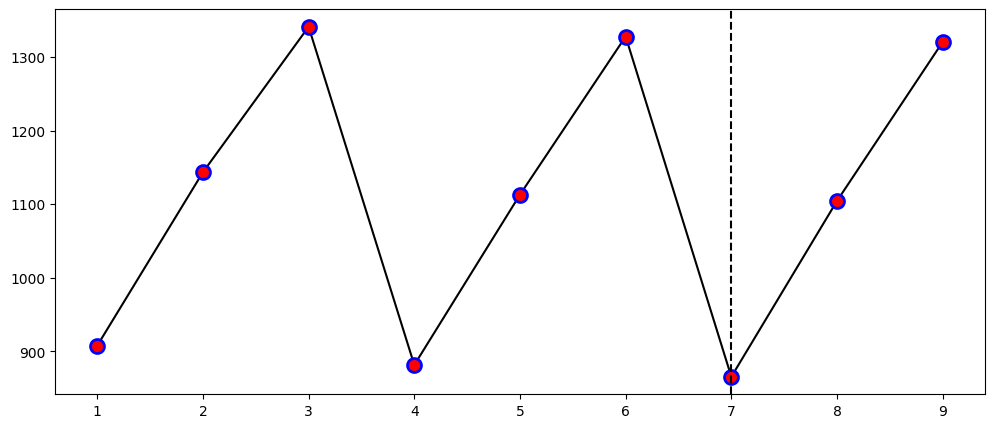

In [109]:


plt.figure(figsize=(12,5))
plt.plot(range(1,10),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')



In [110]:
rfr=RandomForestRegressor(n_estimators=grid.loc[7,'n_estimators'],
                               min_samples_leaf=grid.loc[7,'min_samples_leaf'],
                               max_features=3,random_state=101)

In [111]:
rfr.fit(X_train,y_train.values.ravel())

RandomForestRegressor(max_features=3, min_samples_leaf=np.int64(10),
                      n_estimators=np.int64(150), random_state=101)

In [112]:


rfr.feature_importances_
importance=pd.DataFrame(rfr.feature_importances_,index=[X_train.columns],columns=["importance"])
importance



,importance
Avg. Session Length,0.077725
Time on App,0.216201
Time on Website,0.002517
Length of Membership,0.703557


<Figure size 1200x500 with 0 Axes>

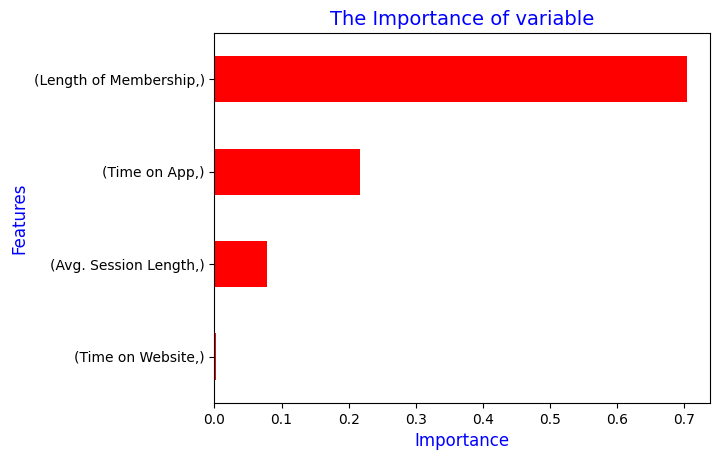

In [113]:


plt.figure(figsize=(12,5))
importance.sort_values(by='importance',ascending=True).plot(kind='barh',color='red',legend=None)
plt.xlabel('Importance',color='blue',fontsize=12)
plt.ylabel('Features',color='blue',fontsize=12)
plt.title('The Importance of variable',color='blue',fontsize=14);



In [114]:


pred_rfr=rfr.predict(X_test)
pred_rfr



array([418.66628071, 430.5189301 , 431.11246773, 586.98857115,
       595.93750361, 556.47326872, 579.38943119, 634.92014188,
       449.49395049, 544.09877586, 360.66045418, 456.3582369 ,
       560.61866343, 411.99944935, 638.39530286, 545.18818862,
       626.57796027, 493.10912268, 538.19970672, 555.14781726,
       477.40789023, 550.23732556, 423.23335988, 489.74932759,
       561.23067588, 450.22693016, 515.65695499, 414.50191243,
       509.59894656, 455.37880478, 574.44817035, 586.83630764,
       481.96661737, 557.73194242, 490.87837771, 560.83682311,
       456.81676552, 449.03467996, 417.52761683, 459.69719232,
       582.02697403, 439.19751196, 613.29627676, 508.12464061,
       494.08555664, 501.94090767, 569.12049444, 521.87666421,
       407.90809053, 473.44670233, 485.21938362, 531.76106903,
       360.84864407, 504.08371381, 552.3835659 , 365.49695603,
       504.89216921, 419.02887872, 473.65014109, 430.70059945,
       520.88881657, 586.31637789, 613.2970813 , 570.29

In [116]:
modes_evaluate=pd.concat([modes_evaluate, pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_rfr),
                           'MSE': metrics.mean_squared_error(y_test,pred_rfr),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_rfr))},
                                                  index=['Random Forest'])])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815
Ridge Regression,7.230973,79.898319,8.938586
Lasso Regression,7.251427,80.544021,8.974632
Decision Tree Regression,26.281544,1095.446481,33.097530
Random Forest,21.075735,951.801461,30.851280


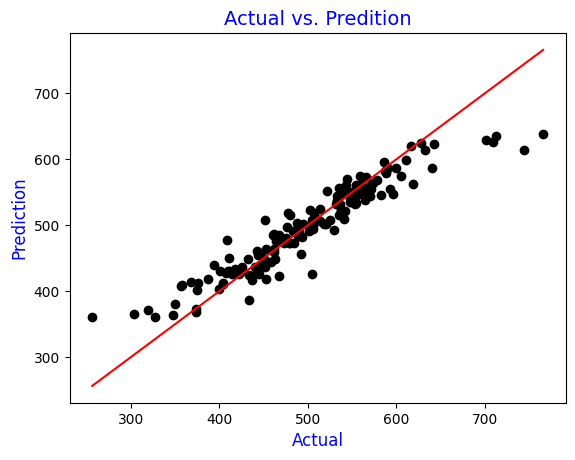

In [117]:
# Actula vs. Prediction
plt.scatter(x=y_test,y=pred_rfr,color='black')
plt.xlabel('Actual',color='blue',fontsize=12)
plt.ylabel('Prediction',color='blue',fontsize=12)
plt.title('Actual vs. Predition',color='blue',fontsize=14)

# Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max(),100)
plt.plot(xp,xp,color='red')


XGBoost Regression


In [118]:


from xgboost import XGBRegressor



In [120]:


xgb_reg=XGBRegressor(max_depth=4,
                    #  the max depth of each tree
                    learning_rate=.01,
                     # the learning rate
                    subsample=.9,
                     # the fraction of sample to be used when constracting each tree
                       reg_lambda=.1, # l2 (Ridge) regulazation term
                    random_state=101

                    )



In [121]:


xgb_reg.fit(X_train,y_train.values.ravel());



In [122]:


import itertools
learning_rate=[.001,.01,.1]
subsample=[.5,.7,.9]
max_depth=[3,4,5]
grid=list(itertools.product(learning_rate,subsample,max_depth))
grid=pd.DataFrame(grid,index=range(1,28),columns=['learning_rate','subsample','max_depth'])
grid



,learning_rate,subsample,max_depth
1,0.001,0.5,3
2,0.001,0.5,4
3,0.001,0.5,5
4,0.001,0.7,3
5,0.001,0.7,4
6,0.001,0.7,5
7,0.001,0.9,3
8,0.001,0.9,4
9,0.001,0.9,5
10,0.010,0.5,3


In [123]:


# k fold cross validtion
from sklearn.model_selection import cross_val_score
er=[]
for i in range(1,28):
    xgb_reg=XGBRegressor(learning_rate=grid.loc[i,'learning_rate'],
                                      subsample=grid.loc[i,'subsample'],
                                  max_depth=grid.loc[i,'max_depth'],random_state=101 )
    Scores=cross_val_score(xgb_reg,X=X_train,y=y_train.values.ravel(),
                           cv=10,scoring='neg_mean_squared_error')
    er.append(-np.mean(Scores))



In [124]:


er



[np.float64(5253.503009129252),
 np.float64(5205.378073347954),
 np.float64(5184.363861402352),
 np.float64(5233.229625737161),
 np.float64(5179.447652134349),
 np.float64(5154.841784838294),
 np.float64(5231.730278141745),
 np.float64(5166.4057463183),
 np.float64(5139.588750283781),
 np.float64(2090.420901385281),
 np.float64(1859.5037863504979),
 np.float64(1776.6313051501552),
 np.float64(2045.1981443565194),
 np.float64(1792.8547154875537),
 np.float64(1706.3214262867903),
 np.float64(2062.34222420412),
 np.float64(1788.1429473766652),
 np.float64(1688.5614896806317),
 np.float64(257.4633926360116),
 np.float64(262.66004816412453),
 np.float64(277.0494714280053),
 np.float64(286.35155540216977),
 np.float64(302.50713370960887),
 np.float64(315.5206955700904),
 np.float64(286.985600935396),
 np.float64(321.8672954836995),
 np.float64(342.98573604478804)]

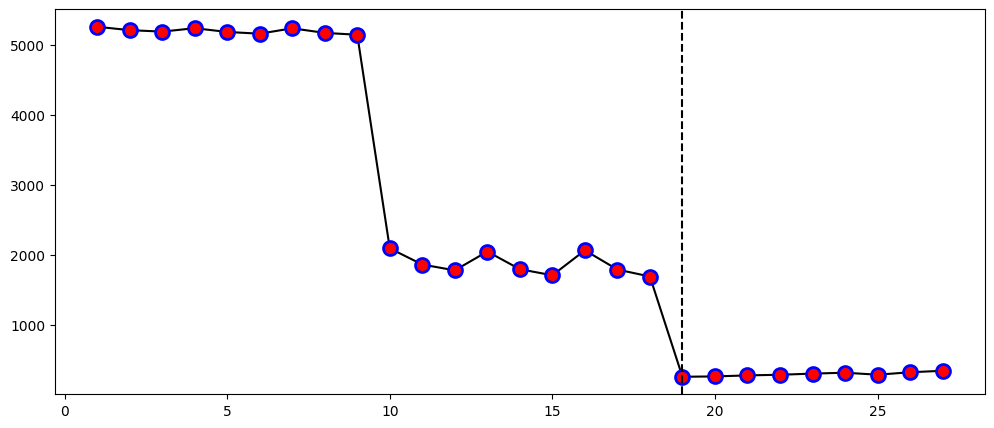

In [125]:


plt.figure(figsize=(12,5))
plt.plot(range(1,28),er,marker='o',markersize=10,
         markerfacecolor='red',color='black',
        markeredgecolor='blue',markeredgewidth=2)
plt.axvline(np.argmin(er)+1,linestyle='--',color='black')



In [128]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg=GradientBoostingRegressor(learning_rate=grid.loc[23,'learning_rate'],
                                      subsample=grid.loc[23,'subsample'],
                                  max_depth=grid.loc[23,'max_depth'],random_state=101 )

In [129]:


gbr_reg.fit(X_train,y_train.values.ravel())



GradientBoostingRegressor(learning_rate=np.float64(0.1), max_depth=np.int64(4),
                          random_state=101, subsample=np.float64(0.7))

In [130]:


pred_gbr=gbr_reg.predict(X_test)
pred_gbr



array([437.35006026, 404.94367938, 415.9223525 , 590.86242952,
       587.87438984, 549.49461305, 578.63410347, 699.25969386,
       456.51416842, 540.40191268, 347.86172806, 477.44785727,
       557.2234368 , 405.46022794, 699.47530929, 540.95617773,
       666.68052288, 494.42978443, 566.69984958, 566.34389551,
       436.65806737, 562.14521671, 462.88425852, 490.57876174,
       565.00558503, 424.19581154, 517.97856304, 386.59342535,
       516.075646  , 462.03899949, 593.27356003, 639.95578119,
       497.54140292, 574.29837171, 495.03621638, 568.2825396 ,
       449.73487269, 455.25803482, 423.78210955, 463.64019481,
       586.56164826, 438.32884824, 614.41576183, 518.08598827,
       496.56121087, 516.76583763, 547.76595451, 528.61001219,
       359.4627058 , 464.08011312, 482.60221641, 536.09954395,
       309.44984495, 507.72944633, 521.50088044, 332.46220823,
       513.32884595, 386.98722276, 472.1949964 , 438.22718092,
       522.21532678, 589.5464049 , 692.81305084, 555.57

In [132]:
modes_evaluate=pd.concat([modes_evaluate, pd.DataFrame({'MAE':metrics.mean_absolute_error(y_test,pred_gbr),
                           'MSE': metrics.mean_squared_error(y_test,pred_gbr),
                           'RMSE':np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))},
                                                  index=['XG_Boost'])])
modes_evaluate

,MAE,MSE,RMSE
Linear Regression,7.228149,79.813052,8.933815
Ridge Regression,7.230973,79.898319,8.938586
Lasso Regression,7.251427,80.544021,8.974632
Decision Tree Regression,26.281544,1095.446481,33.097530
Random Forest,21.075735,951.801461,30.851280
XG_Boost,11.414266,235.360091,15.341450
